In [55]:
#Initializing libraries
import random, copy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pyswarm import pso

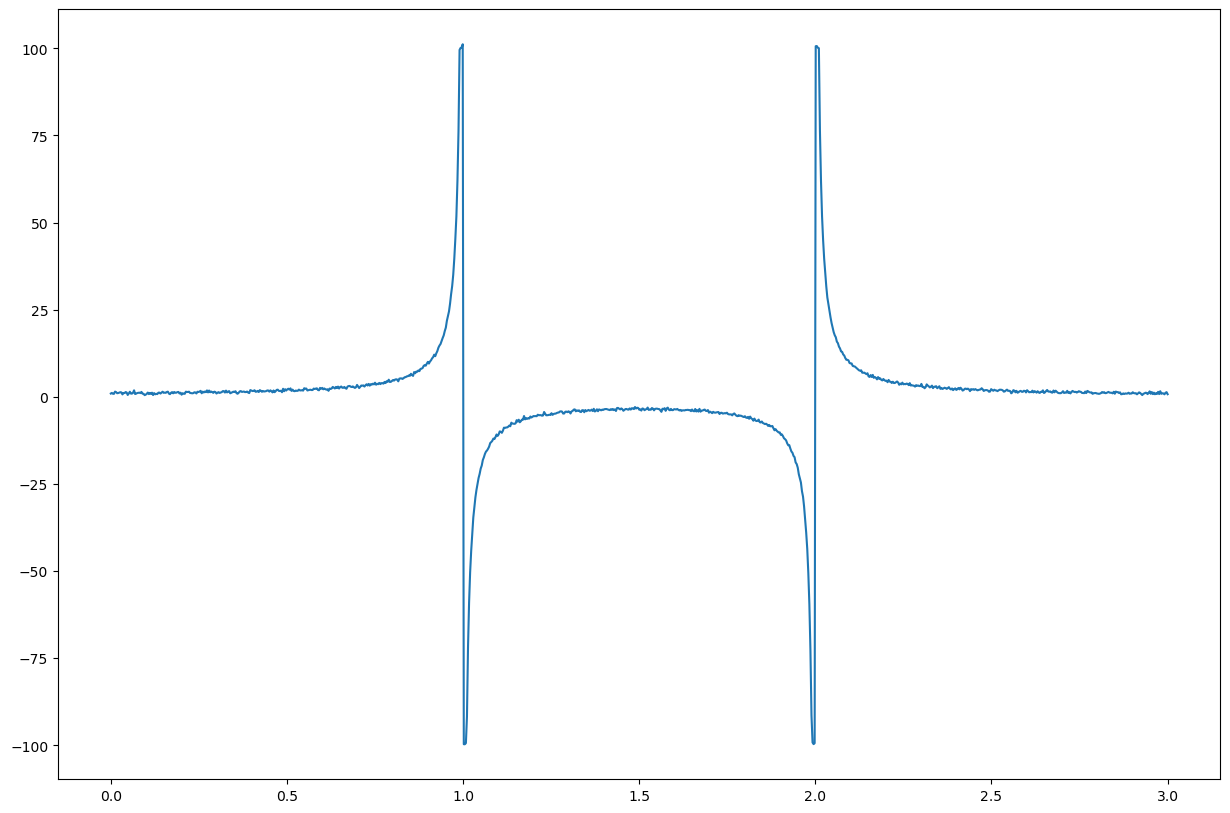

In [56]:
#Generating noisy data (x,y)
k = np.array([i for i in range(0, 1001)])
x = 3 * k / 1000
func = lambda x: 1 / (x ** 2 - 3 * x + 2)
y = func(x)

np.random.seed(12345)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(loc = 0.5, scale = 0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(loc = 0.5, scale = 0.25)
        else:
            y[i] += np.random.normal(loc = 0.5, scale = 0.25)
plt.figure(figsize=(15,10))
plt.plot(x,y)

In [57]:
#Initializating functions
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def least_squares(vector, func, x, y):
    a, b, c, d = vector
    return np.sum((func(x, a, b, c, d) - y) ** 2)

def least_squares_lm(vector, func, x, y):
    a, b, c, d = vector
    return func(x, a, b, c, d) - y

In [58]:
# Solve the approximation problem
# 1. Neldear-Mead method
# 2. Particle swarm optimization
# 3. Levenberg-Marquardt algorithm
# 4. Differential evolution

epsilon = 0.001

# 1. Neldear-Mead method
result_nm = optimize.minimize(least_squares, [1, 1, 1, 1], method='nelder-mead', args=(rational_function, x, y), options={'disp': True, 'maxiter': 1000, 'fatol': epsilon})

# 2. Particle swarm optimization
lb = [-1, -1, -1, -1]
ub = [1, 1, 1, 1]
xopt, fopt = pso(least_squares, lb, ub, maxiter=1000, args=(rational_function, x, y), swarmsize=1000, minfunc=epsilon)
result_pso = xopt

# 3. Levenberg-Marquardt algorithm
result_lm = optimize.least_squares(least_squares_lm, [1, 1, 1, 1], args = (rational_function, x, y), method='lm', ftol=epsilon)

# 4. Differential evolution
result_de = optimize.differential_evolution(least_squares, [(-1, 1), (-1, 1), (-1, 1), (-1, 1)], args = (rational_function, x, y))
bounds = np.array([[-2, 2], [-2, 2], [-2, 2], [-2, 2]])

Optimization terminated successfully.
         Current function value: 135633.169192
         Iterations: 341
         Function evaluations: 576
Stopping search: Swarm best objective change less than 0.001


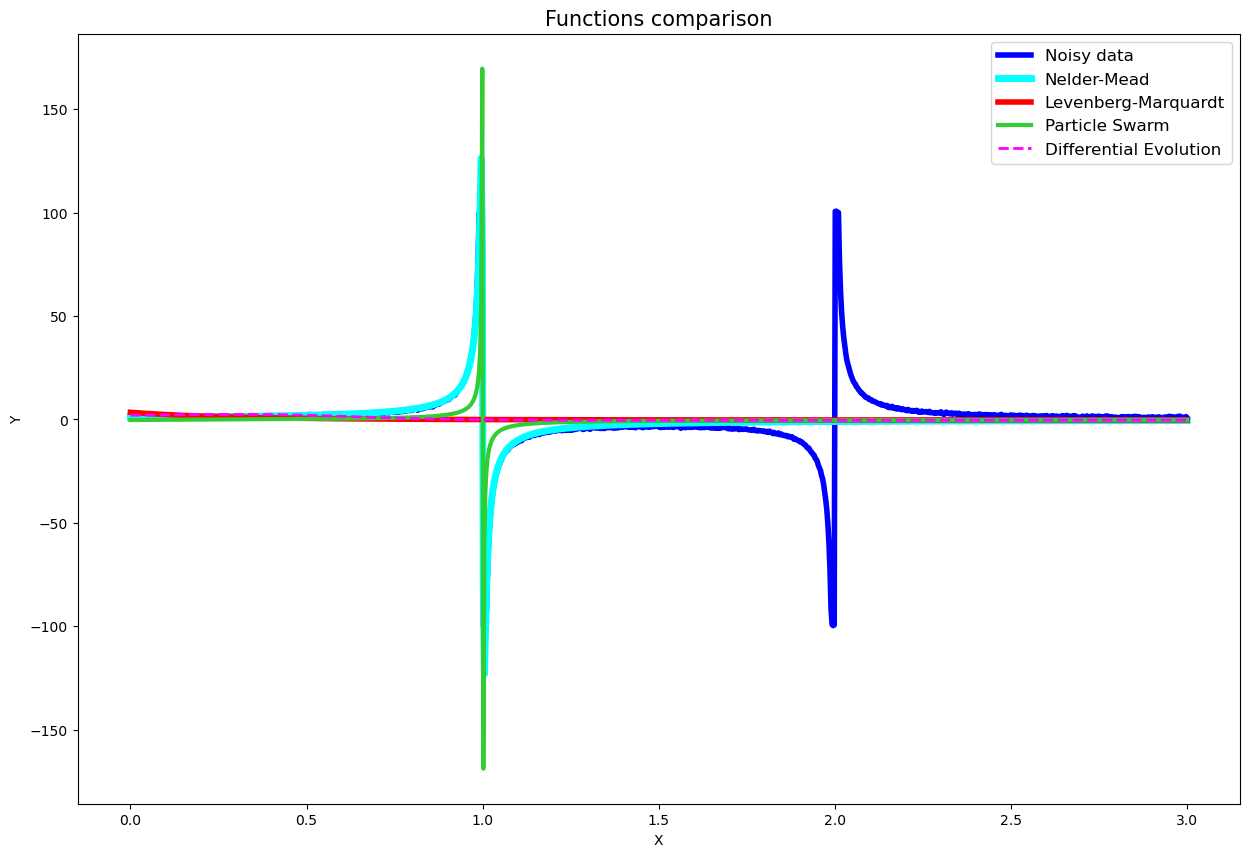

In [59]:
plt.figure(figsize=(15,10))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, 'b', label="Noisy data", linestyle = '-', linewidth=4)
plt.plot(x, rational_function(x, *result_nm.x), 'aqua', label="Nelder-Mead", linewidth=5)
plt.plot(x, rational_function(x, *result_lm.x), 'red', label="Levenberg-Marquardt", linewidth=4)
plt.plot(x, rational_function(x, *result_pso), color='limegreen', label="Particle Swarm", linewidth=3)
plt.plot(x, rational_function(x, *result_de.x), color='magenta', label="Differential Evolution", linestyle = '--', linewidth=2)
plt.legend(fontsize=12)